<a href="https://colab.research.google.com/github/rafaart/DataScienceCO/blob/develop/Desafio_Redes_Convolucionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações e Download do dataset

In [8]:
!pip install --upgrade tensorflow


In [12]:
# Importações
import os
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras import layers, Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Baixar o dataset
!pip install kaggle
!kaggle datasets download -d arbazkhan971/cuhk-face-sketch-database-cufs --force
!unzip -oq "cuhk-face-sketch-database-cufs.zip"

2.17.0
Dataset URL: https://www.kaggle.com/datasets/arbazkhan971/cuhk-face-sketch-database-cufs
License(s): copyright-authors
 85% 96.0M/113M [00:00<00:00, 194MB/s]
100% 113M/113M [00:00<00:00, 124MB/s] 


In [10]:
image_folder = 'photos'
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

# Divide os arquivos em conjuntos de treino e teste (80% treino, 20% teste)
train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)

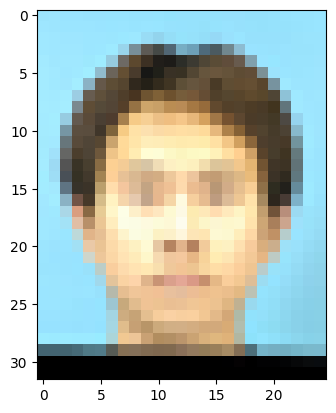

In [11]:
# Exemplo de carregamento

X_train = []
for image_file in train_files:
  try:
    img = Image.open(image_file)
    img = img.resize((25, 32))
    img_array = np.array(img) / 255.0
    X_train.append(img_array)
  except Exception as e:
    print(f"Erro ao carregar imagem {image_file}: {e}")

X_train = np.array(X_train)

plt.imshow(X_train[0])

In [4]:

# Definir o modelo CNN

def build_model():
    model = models.Sequential()
    model.add(layers.Input(shape=(32, 25, 3)))  # Dimensões das imagens "ruins"

    # Camadas convolucionais e de upsampling
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(3, (3, 3), padding='same', activation='sigmoid'))  # Saída de 3 canais (RGB)

    return model

# Construir o modelo
model = build_model()

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Preparar os dados de treinamento
# Supondo que você tenha as imagens "boas" em um array X_good
X_good = []  # Substitua isso pelo carregamento das imagens "boas"
# Carregue as imagens "boas" da mesma maneira que as "ruins"
for image_file in train_files:  # Substitua train_files por arquivos das boas
    try:
        img = Image.open(image_file.replace('ruim', 'bom'))  # Exemplo para ajustar
        img = img.resize((25, 32))
        img_array = np.array(img) / 255.0
        X_good.append(img_array)
    except Exception as e:
        print(f"Erro ao carregar imagem {image_file}: {e}")

X_good = np.array(X_good)

# Treinamento do modelo
model.fit(X_train, X_good, epochs=50, batch_size=32, validation_split=0.2)

# Avaliação do modelo
# Testar com algumas imagens do conjunto de teste
for test_file in test_files[:5]:  # Testar nas primeiras 5 imagens
    img = Image.open(test_file)
    img = img.resize((25, 32))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 32, 25, 3)  # Adiciona dimensão para o batch

    # Prever a imagem
    pred = model.predict(img_array)

    # Visualizar a imagem original e a prevista
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Imagem Original")
    plt.imshow(img_array.squeeze())

    plt.subplot(1, 2, 2)
    plt.title("Imagem Melhorada")
    plt.imshow(pred.squeeze())
    plt.show()


NameError: name 'models' is not defined